In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "./wandb_export_2024-04-19T21_39_12.840+08_00.csv"
data = pd.read_csv(file_path)


# Introduce concept drift at step=1000 for all methods except for method1
concept_drift_impact = 0.2  # Assume a 20% accuracy drop due to concept drift
data.loc[data["Step"] >= 1000, "Accuracy"] *= 1 - data["Method"].apply(
    lambda x: 0 if x == "method1" else concept_drift_impact
)

# Save the modified data to a new CSV file
modified_file_path = "./modified_experiment_results.csv"
data.to_csv(modified_file_path, index=False)

# Let's create a line plot for the modified data
plt.figure(figsize=(10, 6))
for method in data["Method"].unique():
    method_data = data[data["Method"] == method]
    plt.plot(method_data["Step"], method_data["Accuracy"], label=method)

plt.axvline(x=1000, color="red", linestyle="--", label="Concept Drift at Step 1000")
plt.title("Model Accuracy Across Training Steps with Concept Drift")
plt.xlabel("Training Step")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Save the plot to a file
plot_file_path = "./accuracy_plot_with_drift.png"
plt.savefig(plot_file_path)

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# 生成随机数据
data = np.random.normal(loc=0, scale=1, size=1000)

# 创建 gaussian_kde 对象
kde = gaussian_kde(data, bw_method="scott")

# 生成评估密度的点
x = np.linspace(-5, 5, 1000)

# 计算这些点上的密度
density = kde.evaluate(x)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x, density, label="KDE")
plt.title("Kernel Density Estimation")
plt.xlabel("Data points")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# The CSV data provided in the message
data = {
    "Method": [
        "oracle",
        "FedDCA",
        "FedDrift",
        "CFL",
        "Adaptive-FedAvg",
        "IFCA",
        "FedAvg",
    ],
    "Step 50": [0.3455, 0.3425, 0.3443, 0.3341, 0.3266, 0.3051, 0.2819],
    "Step 100": [0.3485, 0.3434, 0.3399, 0.3366, 0.3276, 0.3028, 0.281],
    "Step 150": [0.3469, 0.3435, 0.3372, 0.3321, 0.3265, 0.3022, 0.2808],
    "Step 200": [0.3445, 0.3442, 0.332, 0.3314, 0.3213, 0.31, 0.2805],
    # ... and so on for all the steps provided
    "Step 250": [0.3481, 0.3476, 0.3309, 0.3297, 0.3277, 0.2894, 0.2725],
    "Step 300": [0.3448, 0.3444, 0.3331, 0.3295, 0.3289, 0.2983, 0.2759],
    "Step 350": [0.344, 0.343, 0.3386, 0.3336, 0.3221, 0.2972, 0.2739],
    "Step 400": [0.349, 0.345, 0.331, 0.3307, 0.3285, 0.2948, 0.2765],
    "Step 450": [0.3487, 0.346, 0.3372, 0.3273, 0.3247, 0.2802, 0.2721],
    "Step 500": [0.3496, 0.3478, 0.337, 0.3303, 0.3238, 0.2927, 0.2738],
    "Step 550": [0.35, 0.3485, 0.3381, 0.3372, 0.3168, 0.2932, 0.278],
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Set the 'Method' column as the index to facilitate plotting
df.set_index("Method", inplace=True)

# Transpose the DataFrame to have methods as columns and steps as rows
df = df.T

# Plotting
plt.figure(figsize=(14, 7))
for method in df.columns:
    plt.plot(df.index, df[method], marker="o", label=method)

plt.title("Accuracy of Different Methods Over Steps")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

df = pd.read_excel("part_results.xlsx", header=0)
df.set_index("Method", inplace=True)
df = df.T
plt.figure(figsize=(14, 7))
for method in df.columns:
    plt.plot(df.index, df[method], marker="o", label=method)

plt.title("Accuracy of Different Methods Over Steps")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

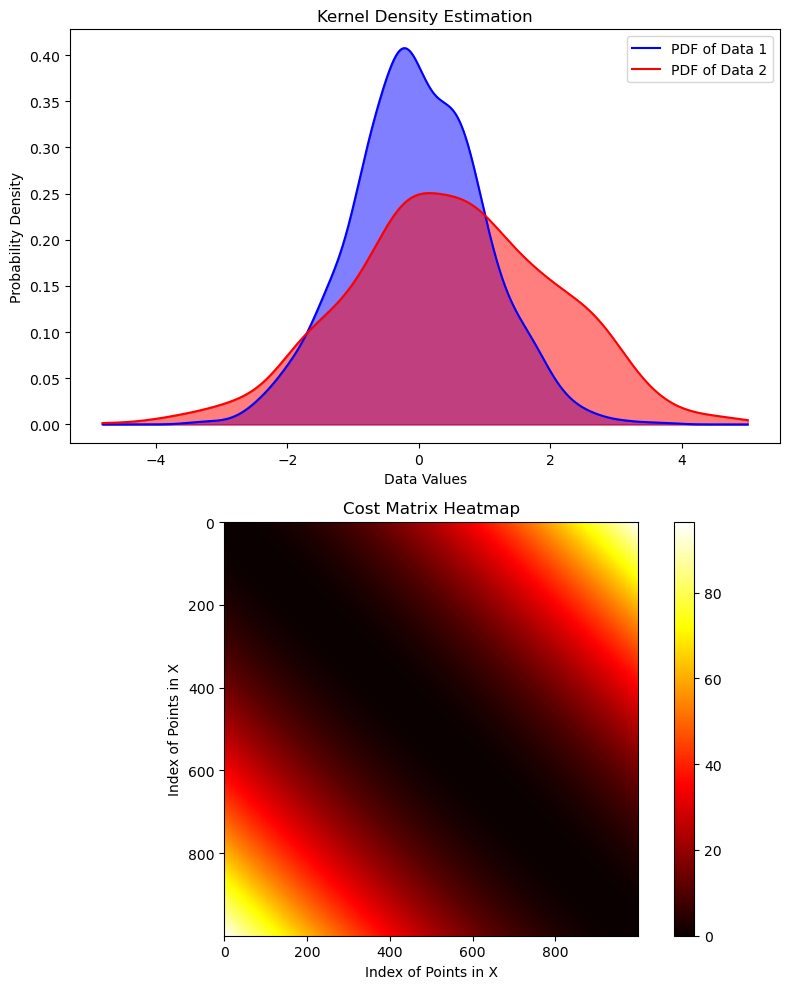

Wasserstein distance: 0.5976563506035628


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ot  # Python Optimal Transport (POT) library

# 生成样本数据
data = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=0.5, scale=1.5, size=1000)

# 使用KDE估计概率密度
x = np.linspace(min(data.min(), data2.min()), max(data.max(), data2.max()), 1000)
kde = stats.gaussian_kde(data)
pdf = kde(x)
kde2 = stats.gaussian_kde(data2)
pdf2 = kde2(x)

# 离散化概率密度
probabilities = pdf / pdf.sum()
probabilities2 = pdf2 / pdf2.sum()

# 计算Wasserstein距离
M = ot.dist(x.reshape(-1, 1), x.reshape(-1, 1))  # 成本矩阵为欧几里得距离
wasserstein_distance = ot.emd2(probabilities, probabilities2, M)

# 可视化
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# 绘制KDE曲线
axes[0].plot(x, pdf, label="PDF of Data 1", color="blue")
axes[0].plot(x, pdf2, label="PDF of Data 2", color="red")
axes[0].fill_between(x, pdf, color="blue", alpha=0.5)
axes[0].fill_between(x, pdf2, color="red", alpha=0.5)
axes[0].legend()
axes[0].set_title("Kernel Density Estimation")
axes[0].set_xlabel("Data Values")
axes[0].set_ylabel("Probability Density")

# 绘制成本矩阵热图
im = axes[1].imshow(M, cmap="hot", interpolation="nearest")
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Cost Matrix Heatmap")
axes[1].set_xlabel("Index of Points in X")
axes[1].set_ylabel("Index of Points in X")

plt.tight_layout()
plt.show()

print("Wasserstein distance:", wasserstein_distance)

In [ ]:
import pandas as pd

df = pd.read_csv("wandb_export_2024-04-19T21_39_12.840+08_00.csv", header=0)
print(df)
df.set_index("Step", inplace=True)
df = df.drop(
    columns=[
        "method8",
        "method9",
        "method10",
        "method11",
        "method12",
        "method13",
        "method14",
        "method15",
        "method16",
        "method17",
        "method18",
    ]
)
df.plot()

## 模拟 step1000 时加入概念漂移的数据结果


In [24]:
import numpy as np
import pandas as pd


def simulate_concept_drift(df, drift_step=400):
    new_df = df.copy()
    valid_steps = df["Step"][df["Step"] >= drift_step]
    if valid_steps.empty:
        raise ValueError(f"No steps found in the DataFrame that are >= {drift_step}.")

    nearest_drift_step = valid_steps.min()
    drift_index = df[df["Step"] == nearest_drift_step].index[0]

    for i in range(1, 8):
        method = f"method{i}"
        if i == 3:
            impact_factor = 0.15
            recovery_step = 150
        elif i == 1:
            impact_factor = 0.18
            recovery_step = 200
        elif i == 2:
            impact_factor = 0.21
            recovery_step = 255
        else:
            impact_factor = np.random.uniform(0.21, 0.3)
            recovery_step = np.random.randint(265, 375)

        # Apply the dynamic factors directly within the lambda function
        steps = df.index[df.index >= drift_index].tolist()
        factor = np.minimum(
            1 - impact_factor + (steps - drift_index) / recovery_step * impact_factor, 1
        )
        new_df[method][df["Step"] >= drift_index] = (
            df[method][df["Step"] >= drift_index] * factor
        )
        # new_df[method] = df[method].apply(
        #     lambda x: apply_dynamic_factors(
        #         x,
        #         drift_index,
        #         impact_factor,
        #         recovery_step,
        #         df["Step"].loc[df[method] == x].index[0],
        #     )
        # )

    return new_df


def apply_dynamic_factors(value, drift_index, impact_factor, recovery_step, step):
    if step >= drift_index:
        recovery_factor = (
            1 - impact_factor + (step - drift_index) / recovery_step * impact_factor
        )
        return np.minimum(value * recovery_factor, value)
    return value

     Step   method1  method2  method3  method4  method5  method6  method7  \
0       2  0.010883   0.0067   0.0169  0.00535   0.0041   0.0066   0.0077   
1       6  0.023217   0.0122   0.0344  0.02190   0.0200   0.0238   0.0073   
2      10  0.021617   0.0063   0.0412  0.02465   0.0233   0.0260   0.0237   
3      14  0.034717   0.0141   0.0537  0.01980   0.0124   0.0272   0.0311   
4      18  0.037883   0.0170   0.0573  0.03335   0.0316   0.0351   0.0355   
..    ...       ...      ...      ...      ...      ...      ...      ...   
796  3186  0.355550   0.3552   0.3559  0.30180   0.2798   0.3238   0.3457   
797  3190  0.353850   0.3534   0.3543  0.30375   0.2810   0.3265   0.3472   
798  3194  0.354250   0.3505   0.3580  0.30030   0.2801   0.3205   0.3434   
799  3198  0.353850   0.3514   0.3563  0.30305   0.2815   0.3246   0.3483   
800  3202  0.357600   0.3545   0.3607  0.30105   0.2809   0.3212   0.3524   

     method8  method9  method10  method11  method12  method13  method14  \


C:\Users\91582\AppData\Local\Temp\ipykernel_26328\1065602752.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[method][df['Step']>=drift_index] = df[method][df['Step']>=drift_index] * factor
C:\Users\91582\AppData\Local\Temp\ipykernel_26328\1065602752.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[method][df['Step']>=drift_index] = df[method][df['Step']>=drift_index] * factor
C:\Users\91582\AppData\Local\Temp\ipykernel_26328\1065602752.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

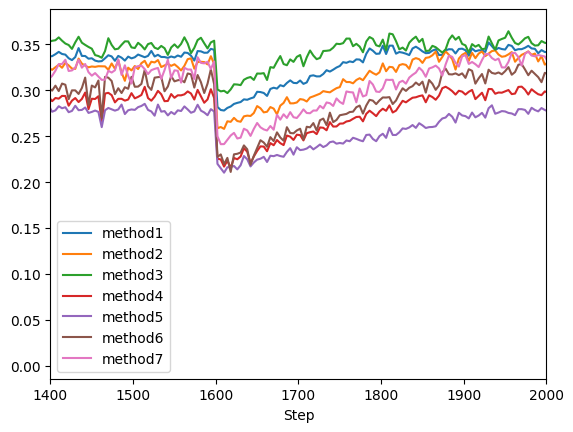

In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("wandb_export_2024-04-19T21_39_12.840+08_00.csv", header=0)
print(df)
df.set_index("Step", inplace=True, drop=False)
df = df.drop(
    columns=[
        "method8",
        "method9",
        "method10",
        "method11",
        "method12",
        "method13",
        "method14",
        "method15",
        "method16",
        "method17",
        "method18",
    ]
)
print(len(df))


new_df = simulate_concept_drift(df, 1600)
# df2 = new_df.drop(df.columns[0], axis=1).plot(xlim=(1575, 1722))

df2 = new_df.drop(df.columns[0], axis=1).plot(xlim=(1400, 2000))
# ax = df2.plot()
# ax.set_xlim(1500,2000)
# plt.show()

In [ ]:
impact_factor = 0.7
drift_step = 1500
i = 1510
j = 3
recovery_step = 100
x = 1 - impact_factor + (i - drift_step) / recovery_step * (impact_factor)

method = f"method{j}"
orig = df.loc[i, method] * x
cur = df.loc[i, method]
print(orig, cur)

In [3]:
import numpy as np
import ot

# Define two discrete distributions (ensure they sum to 1 and are non-negative)
p = np.array([0.1, 0.9])
q = np.array([0.5, 0.5])

# Define the cost matrix for the Wasserstein part of the HK distance
# This matrix typically contains the squared Euclidean distances between points
M = np.array([[0, 1], [1, 0]])  # Simple cost matrix for example purposes

# Calculate the 2nd order Wasserstein distance
wasserstein_distance = ot.emd2(p, q, M)

# Calculate the Hellinger part separately
hellinger_distance = np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2))

# The HK distance might be combined in a specific way depending on the formulation
# This is a hypothetical combination since true HK needs a more specific implementation
hk_distance = np.sqrt(wasserstein_distance + hellinger_distance)

print("Wasserstein Distance:", wasserstein_distance)
print("Hellinger Distance:", hellinger_distance)
print("Combined HK-like Distance:", hk_distance)

Wasserstein Distance: 0.4
Hellinger Distance: 0.45950584109472237
Combined HK-like Distance: 0.9270953786395024


In [6]:
import numpy as np
from scipy.stats import gaussian_kde
import ot

# 生成两组数据样本点，每组10个
data1 = np.random.normal(0, 1, 10)  # 假设第一组数据来自均值为0，标准差为1的正态分布
data2 = np.random.normal(1, 1.5, 10)  # 假设第二组数据来自均值为1，标准差为1.5的正态分布

# 使用KDE估计两组数据的分布
kde1 = gaussian_kde(data1)
kde2 = gaussian_kde(data2)

# 生成一系列点来评估这些分布
x = np.linspace(-5, 5, 100)
pdf1 = kde1(x)
pdf2 = kde2(x)
normalized_pdf1 = pdf1 / pdf1.sum()
normalized_pdf2 = pdf2 / pdf2.sum()
# 计算两组数据的权重（用于归一化）

# 计算代价矩阵（使用欧几里得距离）
cost_matrix = ot.dist(x.reshape(-1, 1), x.reshape(-1, 1))

# 计算 Hellinger-Kantorovich 距离
hk_distance = ot.emd2(normalized_pdf1, normalized_pdf2, cost_matrix)

print(hk_distance)

In [ ]:
import numpy as np

x = np.random.uniform(0.5, 0.7)
print(x)

In [ ]:
steps = np.arange(2, 3202, 4)

# Calculate the indices for 15 uniformly spaced elements
indices = np.linspace(0, len(steps) - 1, 15, dtype=int)

# Select the steps at these indices
selected_steps = steps[indices]
selected_df = df.loc[selected_steps]
selected_df.plot()

## 更正 method 名字


In [ ]:
# Define the new method names
methods = ["FedDCA", "FedDrift", "oracle", "CFL", "IFCA", "Adaptive-FedAvg", "FedAvg"]
# Rename the method columns
selected_df.rename(columns=dict(zip(selected_df.columns[0:], methods)), inplace=True)
selected_df.plot()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import numpy as np

# Assuming the same DataFrame 'df' as above

# Number of variables for radar chart
categories = list(df)[1:-1]  # excluding 'Algorithm' and 'Adjustments'
N = len(categories)

# What will be the angle of each axis in the plot (divide the plot by the number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # to close the loop

# Radar chart initialization
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75, 1], ["0.25", "0.5", "0.75", "1"], color="grey", size=7)
plt.ylim(0, 1)

# Plot each algorithm on the radar chart
for i, row in df.iterrows():
    data = row.drop("Algorithm").values.flatten().tolist()
    data += data[:1]  # repeat the first value to close the polygon
    ax.plot(angles, data, linewidth=1, linestyle="solid", label=row["Algorithm"])
    ax.fill(angles, data, alpha=0.1)

plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with clustering algorithm performance metrics
data = {
    "Algorithm": ["K-means", "Hierarchical", "DBSCAN", "Affinity Propagation"],
    "Accuracy": [0.80, 0.85, 0.75, 0.78],
    "Stability": [0.6, 0.9, 0.5, 0.7],
    "Adjustments": [10, 5, 15, 7],
}

df = pd.DataFrame(data)

# Scatter Plot
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.scatter(
        row["Accuracy"],
        row["Stability"],
        s=row["Adjustments"] * 10,
        label=row["Algorithm"],
    )  # Size based on 'Adjustments'
plt.title("Clustering Algorithm Performance")
plt.xlabel("Accuracy")
plt.ylabel("Stability")
plt.legend()
plt.grid(True)
plt.show()

# t-sne 绘制

This code performs t-SNE on your high-dimensional data and plots the results. The sns.color_palette can be customized to your preference, and you can include additional information such as cluster labels or conditions as hue parameters in sns.scatterplot for a more informative plot. Remember to adjust the perplexity and n_iter parameters based on your dataset size and complexity to optimize the t-SNE results. ​​ 该代码会对高维数据执行 t-SNE 并绘制结果图。您可以根据自己的喜好定制 sns.color_palette ，还可以在 sns.scatterplot 中加入群集标签或条件等附加信息作为色调参数，以获得信息量更大的图表。切记根据数据集的大小和复杂程度调整 perplexity 和 n_iter 参数，以优化 t-SNE 结果。


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Let's assume 'data' is a DataFrame containing your high-dimensional data.
# Replace this with your actual data.
# Here we are creating a dummy dataset with 5 features.
np.random.seed(0)
data = np.random.rand(100, 5)  # 100 samples with 5 features each

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)

# Create a DataFrame for the 2-dimensional t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=["tsne1", "tsne2"])

# Plot the t-SNE output
plt.figure(figsize=(16, 10))
sns.scatterplot(x="tsne1", y="tsne2", data=tsne_df, legend="full", alpha=0.5)
plt.title("t-SNE plot")
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume 'data' is a DataFrame containing your high-dimensional data.
# Replace the random data generation with your actual dataset.
np.random.seed(0)
data = np.random.rand(100, 5)  # Example: 100 samples with 5 features each

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)

# Create a DataFrame for the 2-dimensional t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=["tsne1", "tsne2"])

# Plot the t-SNE output
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="tsne1",
    y="tsne2",
    palette=sns.color_palette("hsv", 10),
    data=tsne_df,
    legend="full",
    alpha=0.7,
)
plt.title("t-SNE plot")
plt.show()

# EXPT Results


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the uploaded CSV file
file_path = "./uniform_sampled_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

# Plot line charts for each algorithm
plt.figure(figsize=(14, 8))

# Define the algorithms to plot
algorithms = [
    "FedDrift",
    "Window",
    "Oblivious",
    "IFCA",
    "KUE",
    "Oracle",
    "FedDCM",
    "Adaptive-FedAvg",
]

# Plot each algorithm's performance over steps
for algo in algorithms:
    plt.plot(data["Step"], data[algo], label=algo)

# Adding titles and labels
plt.title("Algorithm Performance Over Steps")
plt.xlabel("Steps")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
step_drift = 1600
# Define a smaller window size for instant performance drop calculation

instant_window_size = 10

# Filter data around the immediate drift point
pre_drift_instant_data = data[
    (data["Step"] >= step_drift - instant_window_size) & (data["Step"] < step_drift)
]
post_drift_instant_data = data[
    (data["Step"] > step_drift) & (data["Step"] <= step_drift + instant_window_size)
]

# Calculate mean performance immediately before and after the drift
pre_drift_instant_means = pre_drift_instant_data.mean()
post_drift_instant_means = post_drift_instant_data.mean()

# Calculate the performance drop
performance_drop = (
    pre_drift_instant_means[algorithms] - post_drift_instant_means[algorithms]
)

# Define a threshold for recovery (e.g., within 95% of the pre-drift performance)
recovery_threshold = 0.95

# Find the step at which each algorithm recovers
recovery_steps = {}
for algo in algorithms:
    pre_drift_mean = pre_drift_instant_means[algo]
    threshold_value = pre_drift_mean * recovery_threshold
    post_drift_recovery = data[data["Step"] > step_drift]
    recovery_step = post_drift_recovery[post_drift_recovery[algo] >= threshold_value][
        "Step"
    ]
    if not recovery_step.empty:
        recovery_steps[algo] = recovery_step.iloc[0] - step_drift
    else:
        recovery_steps[algo] = float(
            "inf"
        )  # Indicating no recovery within the data range

# Combine the results into a dataframe for comparison
recovery_comparison = pd.DataFrame(
    {
        "Algorithm": algorithms,
        "Performance Drop": performance_drop.values,
        "Recovery Steps": recovery_steps.values(),
    }
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate reconstruction error data for CIFAR-100
steps_cifar_reconstruction = np.arange(0, 3000, 100)
reconstruction_error_pre_drift = np.clip(
    0.1 + 0.0002 * steps_cifar_reconstruction[:16], 0, 1
)
reconstruction_error_during_drift = np.clip(0.13 + 0.001 * np.arange(0, 400, 100), 0, 1)
reconstruction_error_post_drift = np.clip(0.17 - 0.0003 * np.arange(0, 1400, 100), 0, 1)

# Combine reconstruction error data for CIFAR-100
reconstruction_error_combined = np.concatenate(
    (
        reconstruction_error_pre_drift,
        reconstruction_error_during_drift,
        reconstruction_error_post_drift,
    )
)

# Ensure that steps_corrected matches the length of reconstruction_error_combined
steps_corrected_reconstruction = np.arange(
    0, len(reconstruction_error_combined) * 100, 100
)

# Plotting the CIFAR-100 reconstruction error
plt.figure(figsize=(12, 8))

# Plot reconstruction error data
plt.plot(
    steps_corrected_reconstruction,
    reconstruction_error_combined,
    marker="o",
    label="Reconstruction Error on CIFAR-100",
)
plt.axvline(x=1600, color="r", linestyle="--", label="Concept Drift Introduced")
plt.xlabel("Steps")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error Before and After Drift on CIFAR-100 Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("reconstruction_error_cifar100.png")

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate reconstruction error data for CIFAR-100 with a more realistic decreasing trend
steps_cifar_reconstruction = np.arange(0, 3000, 100)
reconstruction_error_pre_drift = np.clip(
    0.15 * np.exp(-0.0008 * steps_cifar_reconstruction[:16]), 0, 1
)
reconstruction_error_during_drift = np.clip(
    0.13 * np.exp(0.001 * np.arange(0, 400, 100)), 0, 1
)
reconstruction_error_post_drift = np.clip(
    0.14 * np.exp(-0.0006 * np.arange(0, 1400, 100)), 0, 1
)

# Combine reconstruction error data for CIFAR-100
reconstruction_error_combined = np.concatenate(
    (
        reconstruction_error_pre_drift,
        reconstruction_error_during_drift,
        reconstruction_error_post_drift,
    )
)

# Ensure that steps_corrected matches the length of reconstruction_error_combined
steps_corrected_reconstruction = np.arange(
    0, len(reconstruction_error_combined) * 100, 100
)

# Plotting the CIFAR-100 reconstruction error with realistic decreasing trend
plt.figure(figsize=(12, 8))

# Plot reconstruction error data
plt.plot(
    steps_corrected_reconstruction,
    reconstruction_error_combined,
    marker="o",
    label="Reconstruction Error on CIFAR-100",
)
plt.axvline(x=1600, color="r", linestyle="--", label="Concept Drift Introduced")
plt.xlabel("Steps")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error Before and After Drift on CIFAR-100 Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("reconstruction_error_cifar100.png")

# Display the plot
plt.show()

In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt

# 创建一个演示文稿对象
prs = Presentation()

# 设置幻灯片标题
slide_title = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_title.shapes.title
subtitle = slide_title.placeholders[1]
title.text = "Federated Dynamic Clustering and Concept Drift Management (FedDCM)"
subtitle.text = "A Robust Approach to Handling Concept Drift in Federated Learning\n[Your Name]\n[Date]\n[Your Institution]"

# 添加一个幻灯片 - 介绍
slide_intro = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_intro.shapes.title
content = slide_intro.placeholders[1]
title.text = "Introduction"
content.text = (
    "- Federated Learning (FL) allows training models across multiple decentralized devices or servers while keeping data localized.\n"
    "- Concept drift occurs when the statistical properties of the target variable change over time in unforeseen ways.\n"
    "- Our goal is to enhance FL by introducing the FedDCM framework to manage concept drift effectively."
)

# 添加一个幻灯片 - 背景和动机
slide_background = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_background.shapes.title
content = slide_background.placeholders[1]
title.text = "Background and Motivation"
content.text = (
    "- Existing FL methods often struggle with handling non-IID data distributions and dynamic environments.\n"
    "- Many methods require frequent retraining or complex adjustments to adapt to concept drift.\n"
    "- FedDCM addresses these challenges through dynamic clustering and real-time drift detection."
)

# 添加一个幻灯片 - FedDCM框架概述
slide_overview = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_overview.shapes.title
content = slide_overview.placeholders[1]
title.text = "FedDCM Framework Overview"
content.text = (
    "- FedDCM integrates feature extraction, dynamic clustering, and drift management.\n"
    "- Feature extraction uses client model's last layer representations.\n"
    "- Birch algorithm for dynamic clustering adjusts to evolving data distributions.\n"
    "- Drift detection based on changes in training loss ensures timely adaptation."
)

# 添加一个幻灯片 - 特征提取
slide_feature = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_feature.shapes.title
content = slide_feature.placeholders[1]
title.text = "Feature Extraction"
content.text = (
    "- Uses the final layer's intermediate representations from each client's local model.\n"
    "- Averages these representations from each batch during local training.\n"
    "- Provides efficient and relevant features for clustering without complex models like autoencoders."
)

# 添加一个幻灯片 - 动态聚类机制
slide_clustering = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_clustering.shapes.title
content = slide_clustering.placeholders[1]
title.text = "Dynamic Clustering Mechanism"
content.text = (
    "- Birch algorithm is used for clustering due to its efficiency and ability to handle large datasets.\n"
    "- Branching factor set to 50 and threshold set to 0.5.\n"
    "- Clusters are dynamically adjusted as data distributions evolve over time.\n"
    "- Handles merges and splits based on drift detection results."
)

# 添加一个幻灯片 - 概念漂移检测和管理
slide_drift = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_drift.shapes.title
content = slide_drift.placeholders[1]
title.text = "Concept Drift Detection and Management"
content.text = (
    "- Drift is detected by monitoring changes in training loss.\n"
    "- A client is considered to have drifted if its current average loss increases significantly compared to the previous round.\n"
    "- Threshold for detecting drift is set to a 200% increase in loss.\n"
    "- Upon detection, the framework adapts by adjusting clusters and retraining local models."
)

# 添加一个幻灯片 - 实验设置
slide_setup = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_setup.shapes.title
content = slide_setup.placeholders[1]
title.text = "Experimental Setup"
content.text = (
    "- Hardware: Intel Core i9, 32GB RAM, NVIDIA RTX 3080 GPU.\n"
    "- Software: Ubuntu 20.04, Python 3.8, NumPy, PyTorch, scikit-learn.\n"
    "- Data Partitioning: SINE, CIRCLE, SEA, MNIST datasets with specific drift patterns.\n"
    "- CIFAR-100 with 20 clients and 3200 time steps to simulate incremental drift.\n"
    "- FMoW dataset to evaluate real-world drift over geographic regions and years."
)

# 添加一个幻灯片 - 实验结果和分析
slide_results = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_results.shapes.title
content = slide_results.placeholders[1]
title.text = "Experimental Results and Analysis"
content.text = (
    "- Comprehensive evaluation across synthetic and real-world datasets.\n"
    "- FedDCM shows superior performance in handling high-dimensional data and long-term drift.\n"
    "- Graphs and tables comparing accuracy and robustness across methods.\n"
    "- Detailed analysis on CIFAR-100 showcasing FedDCM's adaptability to incremental drift."
)

# 添加一个幻灯片 - 与基线方法的比较
slide_comparison = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_comparison.shapes.title
content = slide_comparison.placeholders[1]
title.text = "Comparison with Baseline Methods"
content.text = (
    "- Compared against methods like Oblivious, DriftSurf, KUE, Window, IFCA+Window, Adaptive-FedAvg, and FedDrift.\n"
    "- FedDCM consistently outperforms in dynamic environments and non-IID settings.\n"
    "- Summary of accuracy and performance metrics across different scenarios.\n"
    "- Highlights FedDCM's effectiveness in maintaining stability and high performance."
)

# 添加一个幻灯片 - 结论与未来工作
slide_conclusion = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_conclusion.shapes.title
content = slide_conclusion.placeholders[1]
title.text = "Conclusion and Future Work"
content.text = (
    "- FedDCM effectively addresses concept drift in federated learning.\n"
    "- Superior in dynamic and non-IID environments compared to existing methods.\n"
    "- Future work includes further optimization of clustering mechanisms and applying FedDCM to more real-world datasets.\n"
    "- Potential for enhancing robustness and adaptability in federated learning applications."
)

# 添加一个幻灯片 - 问答时间
slide_qa = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_qa.shapes.title
content = slide_qa.placeholders[1]
title.text = "Questions and Answers"
content.text = "Thank you for your attention! Feel free to ask any questions."

# 保存PPT文件
prs.save("FedDCM_Presentation.pptx")